In [1]:
# Package imports
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

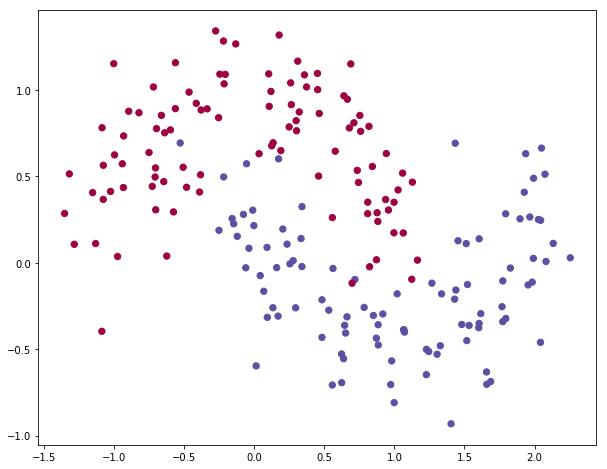

In [2]:
np.random.seed(0)
X,y = sklearn.datasets.make_moons(200, noise=0.2)
plt.scatter(X[:,0],X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [3]:
print (X.shape)
print (X[:5])

(200, 2)
[[ 0.74346118  0.46465633]
 [ 1.65755662 -0.63203157]
 [-0.15878875  0.25584465]
 [-1.088752   -0.39694315]
 [ 1.768052   -0.25443213]]


In [4]:
print (y.shape)
print (y[0:5])

(200,)
[0 1 1 0 1]


In [5]:
b = np.transpose([[2,1]])
print (b)

[[2]
 [1]]


In [6]:
result = X.dot(b)
print (result.shape)

(200, 1)


In [7]:
np.random.seed(0)
nn_input_dim = 2
nn_hdim = 3
nn_output_dim = 1
W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
b1 = np.zeros((1, nn_hdim))
W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
b2 = np.zeros((1, nn_output_dim))

In [8]:
print (W1)

[[ 1.24737338  0.28295388  0.69207227]
 [ 1.58455078  1.32056292 -0.69103982]]


In [9]:
print (X.shape)
print (W1.shape)
XW1 = X.dot(W1)
print (XW1.shape)
print (b1.shape)
XW1b1 = XW1 + b1
print (XW1b1.shape)

(200, 2)
(2, 3)
(200, 3)
(1, 3)
(200, 3)


In [10]:
np.array([[0, 1, 1, 0]]).T

array([[0],
       [1],
       [1],
       [0]])

In [11]:
import numpy as np
from numpy import array
 
epochs = 500           # Number of iterations
inputLayerSize, hiddenLayerSize, outputLayerSize = 3, 2, 1
 
X = np.array([0.5, -0.2, 0.1])
Y = np.array([[0.4]])
 
def sigmoid (x): return 1/(1 + np.exp(-x))      # activation function
def sigmoid_(x): return x * (1 - x)             # derivative of sigmoid
                                                # weights on layer inputs
Wh = np.random.uniform(size=(inputLayerSize, hiddenLayerSize))
Wz = np.random.uniform(size=(hiddenLayerSize,outputLayerSize))

    
for i in range(epochs):
 
    H = sigmoid(np.dot(X, Wh))                  # hidden layer results
    Z = sigmoid(np.dot(H, Wz))                  # output layer results
    E = Y - Z                                   # how much we missed (error)
    dZ = E * sigmoid_(Z)                        # delta Z
    dH = dZ.dot(Wz.T) * sigmoid_(H)             # delta H
    
    Wz +=  (dZ * H).T                          # update output layer weights
    
    Wh +=  X.reshape(inputLayerSize,1).dot(dH) # update hidden layer weights
     
print(Z)                # what have we learnt?

[ 0.4]


In [12]:
print (X.shape)
print (Wh.shape)
print (H)

(3,)
(3, 2)
[ 0.58134699  0.50945316]


In [8]:
# Load pickled data
import numpy as np


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_(x):
    return x*(1-x)

class NeuralNetwork(object):
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes  # 3
        self.hidden_nodes = hidden_nodes  # 2
        self.output_nodes = output_nodes  # 1

        # Initialize weights
        self.weights_input_to_hidden = np.random.normal(0.0, self.hidden_nodes ** -0.5,
                                                        (self.hidden_nodes, self.input_nodes))

        self.weights_hidden_to_output = np.random.normal(0.0, self.output_nodes ** -0.5,
                                                         (self.output_nodes, self.hidden_nodes))
        self.lr = learning_rate

        #### Set this to your implemented sigmoid function ####
        # Activation function is the sigmoid function
        self.activation_function = sigmoid

    def train(self, inputs_list, targets_list):
        # Convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T

        #### Implement the forward pass here ####
        ### Forward pass ###
        # TODO: Hidden layer
        hidden_inputs = self.weights_input_to_hidden.dot(inputs)  # signals into hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)  # signals from hidden layer

        # TODO: Output layer
        final_inputs = self.weights_hidden_to_output.dot(hidden_outputs)  # signals into final output layer
        final_outputs = self.activation_function(final_inputs)  # signals from final output layer

        #### Implement the backward pass here ####
        ### Backward pass ###

        # TODO: Output error
        output_errors = targets - final_outputs  # Output layer error is the difference between desired target and actual output.

        # TODO: Backpropagated error
        hidden_errors = final_outputs * (1 - final_outputs) * output_errors  # errors propagated to the hidden layer
        hidden_grad = hidden_errors.dot(self.weights_hidden_to_output) * hidden_outputs.T * (1 - hidden_outputs.T)

        # TODO: Update the weights
        self.weights_hidden_to_output += self.lr * (hidden_outputs.dot(
                hidden_errors).T)  # update hidden-to-output weights with gradient descent step
        self.weights_input_to_hidden += self.lr * hidden_grad.T.dot(
                inputs.T)  # update input-to-hidden weights with gradient descent step

    
    def train2(self, inputs_list, targets_list):
        # Convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
    
        H = sigmoid(np.dot(self.weights_input_to_hidden,inputs))                  # hidden layer results
        Z = sigmoid(np.dot(H, self.weights_hidden_to_output))                  # output layer results
        E = targets - Z                                   # how much we missed (error)
        dZ = E * sigmoid_(Z)                        # delta Z
        dH = dZ.dot(self.weights_hidden_to_output.T) * sigmoid_(H)             # delta H
        

        self.weights_hidden_to_output +=  self.lr * H.T.dot(dZ)                          # update output layer weights
        self.weights_input_to_hidden +=  self.lr * dH.dot(inputs.T) # update hidden layer weights
    
    
    def run(self, inputs_list):
        # Run a forward pass through the network
        inputs = np.array(inputs_list, ndmin=2).T

        #### Implement the forward pass here ####
        # TODO: Hidden layer
        hidden_inputs = self.weights_input_to_hidden.dot(inputs)  # signals into hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)  # signals from hidden layer

        # TODO: Output layer
        final_inputs = self.weights_hidden_to_output.dot(hidden_outputs)  # signals into final output layer
        final_outputs = self.activation_function(final_inputs)  # signals from final output layer

        return final_outputs


In [19]:
inputs = [0.5, -0.2, 0.1]
targets = [0.4]
test_w_i_h = np.array([[0.1, 0.4, -0.3],
                       [-0.2, 0.5, 0.2]])
test_w_h_o = np.array([[0.3, -0.1]])

network = NeuralNetwork(3, 100, 1, 0.05)
network.weights_input_to_hidden = test_w_i_h.copy()
network.weights_hidden_to_output = test_w_h_o.copy()

network.train2(inputs, targets)

In [20]:
network.weights_hidden_to_output

array([[ 0.29841872, -0.10103637]])

In [16]:
np.allclose(network.weights_hidden_to_output,np.array([[ 0.37275328, -0.03172939]]))

False

In [25]:
inputs_list = [0.5, -0.2, 0.1]

inputs = np.array(inputs_list, ndmin=2).T

print (inputs)

[[ 0.5]
 [-0.2]
 [ 0.1]]


In [36]:
test_w_i_h = np.array([[0.1, 0.4, -0.3],
                       [-0.2, 0.5, 0.2]])

print (test_w_i_h)
print (test_w_i_h.T)

[[ 0.1  0.4 -0.3]
 [-0.2  0.5  0.2]]
[[ 0.1 -0.2]
 [ 0.4  0.5]
 [-0.3  0.2]]


In [37]:
sigmoid(test_w_i_h.dot(inputs))

array([[ 0.4850045 ],
       [ 0.45512111]])

In [48]:
hhh = sigmoid(inputs.T.dot(test_w_i_h.T))
print (hhh)

[[ 0.4850045   0.45512111]]


In [49]:
test_w_h_o = np.array([[0.3, -0.1]])
hhh.dot(test_w_h_o.T)

array([[ 0.09998924]])

In [45]:
ddd = sigmoid(test_w_i_h.dot(inputs))
print (ddd)
test_w_h_o.dot(ddd)

[[ 0.4850045 ]
 [ 0.45512111]]


array([[ 0.09998924]])

In [2]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([ [0],   [1],   [1],   [0]])

In [7]:
Q = np.array([[0,0], [0,1], [1,0], [1,1]])
A = np.array([ [0,1],   [1,1],   [1,1],   [0,1]])

print (Q.shape)
print (A.shape)

(4, 2)
(4, 2)


In [14]:
print (Q*A)
np.dot(Q,A.T)


[[0 0]
 [0 1]
 [1 0]
 [0 1]]


array([[0, 0, 0, 0],
       [1, 1, 1, 1],
       [0, 1, 1, 0],
       [1, 2, 2, 1]])

In [15]:
print (Q.dot(A.T))

[[0 0 0 0]
 [1 1 1 1]
 [0 1 1 0]
 [1 2 2 1]]


In [17]:
X.shape

print (X.T)

[[0 0 1 1]
 [0 1 0 1]]


In [7]:
Y.shape

(4, 1)

In [8]:
Y1 = np.array([[1,2,3]])

In [10]:
Y1.shape

(1, 3)

In [13]:
inputLayerSize, hiddenLayerSize, outputLayerSize = 2, 3, 1
Wh = np.random.uniform(size=(inputLayerSize, hiddenLayerSize))
Wz = np.random.uniform(size=(hiddenLayerSize,outputLayerSize))

In [16]:
Wh.shape
print (Wh)

[[ 0.19368663  0.12160283  0.01249285]
 [ 0.86701655  0.11876727  0.89627411]]


In [15]:
Wz.shape

(3, 1)